In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Step 1: Get climate data from ECAD
go to www.ecad.eu
go to "Daily data"
click on "Custom query (ASCII)"
set fields as in the table:
field	value
Type of series	blend
Country	your country
Location	your city or area
Element	Mean temperature
click on "Next"
click on "Download" and download the data
Important: The ECAD data is made available for public use. However, do not redistribute the raw data (on your GitHub profile or elsewhere)

### Step 2: Read the data into a DataFrame
Reading the ECAD data into pandas is a bit trickier than a standard CSV file. You will need to inspect the file in a text editor (not Excel). Pay attention to the following:

what is the column separator?
are there any headers?
how many lines contain comments before the real data starts?
Look up the parameters of pd.read_csv(). They are sufficient to read the file.

First 20 rows are introduction text and need to be skipped with 'skiprows'

In [2]:
df = pd.read_csv('/Users/melvinrinkleff/dev/code/22_fall_data_science/ECA_blended_custom/TG_STAID002759.txt',
              names=['SOUID', 'DATE', 'TG', 'Q_TG'], skiprows=20)

In [3]:
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


### Step 3: Data Wrangling
The TG column contains the temperature measured in 0.1 Celsius degrees. This was probably established decades ago when disk space and memory were more expensive (integers take less space).

Create a new column by dividing the temperature by 10.
Plot the raw temperature data as a line plot.

In [4]:
df['Temperature'] = df.apply(lambda row: row.TG/10, axis=1)

In [5]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature
0,127488,18760101,22,0,2.2
1,127488,18760102,25,0,2.5
2,127488,18760103,3,0,0.3
3,127488,18760104,-58,0,-5.8
4,127488,18760105,-98,0,-9.8


<AxesSubplot:xlabel='DATE'>

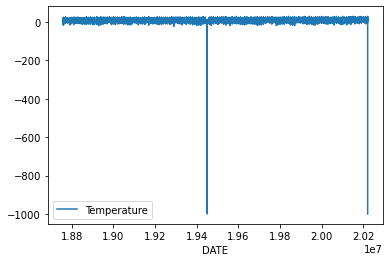

In [6]:
df.plot('DATE', 'Temperature')

### Step 4: Time Axis
The DATE column contains timestamps in the YYYYMMDD format. You need to convert these to pandas timestamps.

First, convert the DATE column to a string data type.

Second, use the following expression to slice off year, month and day:

df['year'] = df[col].str[x:y]
Put the elements into separate columns. Then, create a new date column via string concatenation:

df[col1] + '-' + df[col2]
The final date column should have the format YYYY-MM-DD. Now you can convert the strings with dates into a timestamp index with:

df.set_index(pd.to_datetime(date_series))
Plot the temperature as a line plot again. Now, the x-axis should look much better.

In [7]:
df['DATE'] = df['DATE'].astype(str)

In [8]:
df['year'] = df['DATE'].str[0:4]
df['month'] = df['DATE'].str[4:6]
df['day'] = df['DATE'].str[6:]

In [9]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day
0,127488,18760101,22,0,2.2,1876,01,01
1,127488,18760102,25,0,2.5,1876,01,02
2,127488,18760103,3,0,0.3,1876,01,03
3,127488,18760104,-58,0,-5.8,1876,01,04
4,127488,18760105,-98,0,-9.8,1876,01,05


In [10]:
df['Date'] = df['year'] + '-' + df['month'] + '-' + df['day']

In [11]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day,Date
0,127488,18760101,22,0,2.2,1876,01,01,1876-01-01
1,127488,18760102,25,0,2.5,1876,01,02,1876-01-02
2,127488,18760103,3,0,0.3,1876,01,03,1876-01-03
3,127488,18760104,-58,0,-5.8,1876,01,04,1876-01-04
4,127488,18760105,-98,0,-9.8,1876,01,05,1876-01-05


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df = df.set_index('Date', drop=True)

In [14]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day
Date,,,,,,,,
1876-01-01,127488,18760101,22,0,2.2,1876,01,01
1876-01-02,127488,18760102,25,0,2.5,1876,01,02
1876-01-03,127488,18760103,3,0,0.3,1876,01,03
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05


In [15]:
del df['TG']
del df['DATE']
del df['year']
del df['month']
del df['day']
del df['SOUID']

In [16]:
df.head()

,Q_TG,Temperature
Date,,
1876-01-01,0,2.2
1876-01-02,0,2.5
1876-01-03,0,0.3
1876-01-04,0,-5.8
1876-01-05,0,-9.8


In [24]:
df.plot(y='Temeprature',color='blue')
plt.show()

KeyError: 'Temeprature'